In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [76]:
killed_df = pd.read_csv('Road_Accidents_2017-Annuxure_Tables_3.csv')

In [77]:
killed_df.head(5)

,States/UTs,State/UT-wise Total Number of Persons Killed in Road Accidents during - 2014,State/UT-wise Total Number of Persons Killed in Road Accidents during - 2015,State/UT-wise Total Number of Persons Killed in Road Accidents during - 2016,State/UT-wise Total Number of Persons Killed in Road Accidents during - 2017,Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2014,Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2015,Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2016,Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2017,Total Number of Persons Killed in Road Accidents Per Lakh Population - 2014,Total Number of Persons Killed in Road Accidents Per Lakh Population - 2015,Total Number of Persons Killed in Road Accidents Per Lakh Population - 2016,Total Number of Persons Killed in Road Accidents Per Lakh Population - 2017,"Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2014","Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2015","Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2016","Total Number of Persons Killed in Road Accidents per 10,000 Km of Roads - 2014","Total Number of Persons Killed in Road Accidents per 10,000 Km of Roads - 2015","Total Number of Persons Killed in Road Accidents per 10,000 Km of Roads - 2016"
0,Andhra Pradesh,7908,8297,8541,8060,5.7,5.7,5.7,5.4,9.1,9.5,9.7,9.1,11.3,10.5,9.8,444.0,463.5,489.8
1,Arunachal Pradesh,119,127,149,110,0.1,0.1,0.1,0.1,9.3,9.8,11.3,8.3,7.9,8.4,5.6,48.6,50.1,48.5
2,Assam,2522,2397,2572,2783,1.8,1.6,1.7,1.9,8.0,7.5,7.9,8.5,11.4,9.6,9.1,80.4,73.4,78.1
3,Bihar,4913,5421,4901,5554,3.5,3.7,3.3,3.8,4.8,5.3,4.7,5.3,11.8,11.3,8.9,234.2,263.1,237.4
4,Chhattisgarh,4022,4082,3908,4136,2.9,2.8,2.6,2.8,15.9,16.0,15.1,15.8,10.4,9.5,8.1,425.3,418.5,407.9


In [78]:
killed_df = killed_df.drop(columns=['Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2014','Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2015','Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2016','Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2017','Total Number of Persons Killed in Road Accidents Per Lakh Population - 2014','Total Number of Persons Killed in Road Accidents Per Lakh Population - 2015','Total Number of Persons Killed in Road Accidents Per Lakh Population - 2016','Total Number of Persons Killed in Road Accidents Per Lakh Population - 2017','Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2014','Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2015','Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2016','Total Number of Persons Killed in Road Accidents per 10,000 Km of Roads - 2014','Total Number of Persons Killed in Road Accidents per 10,000 Km of Roads - 2015','Total Number of Persons Killed in Road Accidents per 10,000 Km of Roads - 2016'])

In [79]:
killed_df.head(5)

,States/UTs,State/UT-wise Total Number of Persons Killed in Road Accidents during - 2014,State/UT-wise Total Number of Persons Killed in Road Accidents during - 2015,State/UT-wise Total Number of Persons Killed in Road Accidents during - 2016,State/UT-wise Total Number of Persons Killed in Road Accidents during - 2017
0,Andhra Pradesh,7908,8297,8541,8060
1,Arunachal Pradesh,119,127,149,110
2,Assam,2522,2397,2572,2783
3,Bihar,4913,5421,4901,5554
4,Chhattisgarh,4022,4082,3908,4136


In [80]:
killed_df=killed_df.rename(columns={'States/UTs':'Names','State/UT-wise Total Number of Persons Killed in Road Accidents during - 2014':'In 2014','State/UT-wise Total Number of Persons Killed in Road Accidents during - 2015':'In 2015','State/UT-wise Total Number of Persons Killed in Road Accidents during - 2016':'In 2016','State/UT-wise Total Number of Persons Killed in Road Accidents during - 2017':'In 2017'})

In [81]:
N_India = ['Jammu & Kashmir', 'Delhi' , 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh']
S_India = ['Telangana', 'Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu']
E_India = ['Odisha', 'Bihar', 'Jharkhand', 'West Bengal']
W_India = ['Gujarat', 'Rajasthan' ,'Maharashtra','Goa']
Central_India = ['Madhya Pradesh', 'Chhattisgarh']
NE_India = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
UT = ['Puducherry', 'Andaman & Nicobar Islands', 'Dadra & Nagar Haveli', 'Daman & Diu', 'Lakshadweep', 'A & N Islands', 'D & N Haveli']

In [82]:
def zones(row):
    if row['Names'].strip() in N_India:
        z = 'North Zone'
    elif row['Names'].strip()  in S_India:
        z = 'South Zone'
    elif row['Names'].strip()  in E_India:
        z = 'East Zone'
    elif row['Names'].strip()  in W_India:
        z = 'West Zone'
    elif row['Names'].strip()  in Central_India:
        z = 'Central Zone'
    elif row['Names'].strip()  in NE_India:
        z = 'NE Zone'
    elif row['Names'].strip()  in UT:
        z = 'UnionTerritory'
    else:
        z = 'NULL'
    return z

In [83]:
killed_df.drop(killed_df[killed_df['Names'] == 'Total'].index, inplace=True) #delete total row (inplace)
killed_df['Zones'] = killed_df.apply(zones, axis=1) # adds an additional column of zone names 

In [84]:
killed_df

,Names,In 2014,In 2015,In 2016,In 2017,Zones
0,Andhra Pradesh,7908,8297,8541,8060,South Zone
1,Arunachal Pradesh,119,127,149,110,NE Zone
2,Assam,2522,2397,2572,2783,NE Zone
3,Bihar,4913,5421,4901,5554,East Zone
4,Chhattisgarh,4022,4082,3908,4136,Central Zone
5,Goa,290,311,336,328,West Zone
6,Gujarat,7955,8119,8136,7289,West Zone
7,Haryana,4483,4879,5024,5120,North Zone
8,Himachal Pradesh,1199,1096,1271,1203,North Zone
9,Jammu & Kashmir,992,917,958,926,North Zone


## Zone wise analysis of Road accidents due to improper road conditions in India
### sub parts: 
###           i) Year wise
###          ii) State wise 

## South Zone Analysis

Text(0.5, 1.0, 'Number of people killed in Road accidents in South Zone due to improper Road conditions\n(Year wise)')

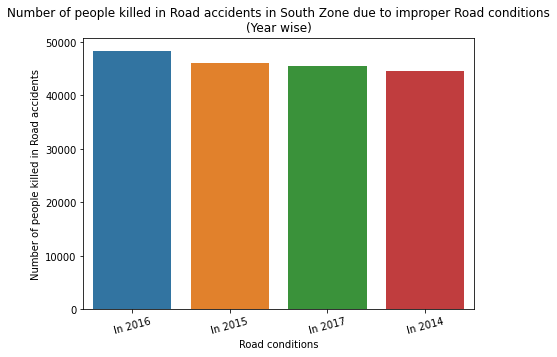

In [85]:
ins_df = killed_df[killed_df['Zones']=='South Zone'] #takes all rows under south zone
df=pd.pivot_table(ins_df, index=['Zones'], values=['In 2014','In 2015','In 2016','In 2017' ],fill_value=0,aggfunc=np.sum,).reset_index()
df=df.T
df=df.reset_index()
df=df.rename(columns={'index':'Road conditions',0:'Total'})
df=df.drop(df.index[0])
df=df.sort_values(by=['Total'],ascending = False).head(4)
df
fig,ax=plt.subplots(1,1,figsize=(7,5)) #set figspace
sns.barplot(x=df['Road conditions'],y=df['Total'])
plt.xticks(rotation=15)
plt.ylabel('Number of people killed in Road accidents')
plt.title('Number of people killed in Road accidents in South Zone due to improper Road conditions\n(Year wise)')

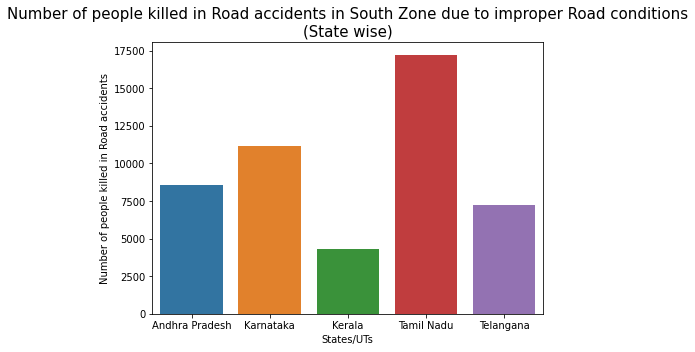

In [86]:
ins_df = killed_df[killed_df['Zones'] == 'South Zone']
df=pd.pivot_table(ins_df, index=['Names'],values=['In 2014','In 2015','In 2016','In 2017'],aggfunc=np.sum).reset_index()
df
years = ['In 2014','In 2015','In 2016','In 2017']
fig,ax = plt.subplots(1,1,figsize=(7,5))
for i,year in enumerate(years):
    sns.barplot(x=df['Names'],y=df[year])
    plt.xlabel('States/UTs')
    plt.ylabel('Number of people killed in Road accidents')
    plt.title('Number of people killed in Road accidents in South Zone due to improper Road conditions\n(State wise)', fontsize=15)

## North Zone Analysis

Text(0.5, 1.0, 'Number of people killed in Road accidents in North Zone due to improper Road conditions\n(Year wise)')

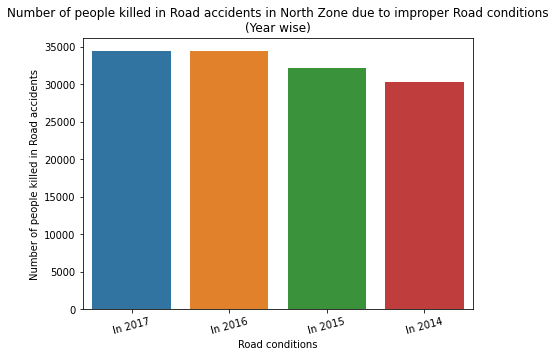

In [87]:
ins_df = killed_df[killed_df['Zones']=='North Zone'] #takes all rows under south zone
df=pd.pivot_table(ins_df, index=['Zones'], values=['In 2014','In 2015','In 2016','In 2017' ],fill_value=0,aggfunc=np.sum,).reset_index()
df=df.T
df=df.reset_index()
df=df.rename(columns={'index':'Road conditions',0:'Total'})
df=df.drop(df.index[0])
df=df.sort_values(by=['Total'],ascending = False).head(4)
df
fig,ax=plt.subplots(1,1,figsize=(7,5)) #set figspace
sns.barplot(x=df['Road conditions'],y=df['Total'])
plt.xticks(rotation=15)
plt.ylabel('Number of people killed in Road accidents')
plt.title('Number of people killed in Road accidents in North Zone due to improper Road conditions\n(Year wise)')

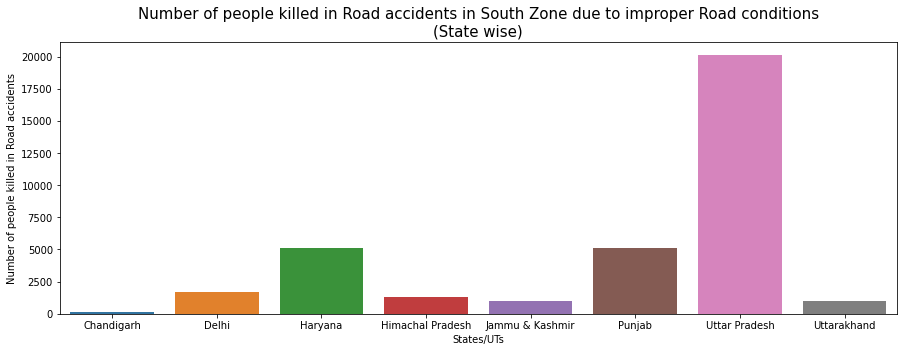

In [88]:
ins_df = killed_df[killed_df['Zones'] == 'North Zone']
df=pd.pivot_table(ins_df, index=['Names'],values=['In 2014','In 2015','In 2016','In 2017'],aggfunc=np.sum).reset_index()
df
years = ['In 2014','In 2015','In 2016','In 2017']
fig,ax = plt.subplots(1,1,figsize=(15,5))
for i,year in enumerate(years):
    sns.barplot(x=df['Names'],y=df[year])
    plt.xlabel('States/UTs')
    plt.ylabel('Number of people killed in Road accidents')
    plt.title('Number of people killed in Road accidents in South Zone due to improper Road conditions\n(State wise)', fontsize=15)

## East Zone Analysis

Text(0.5, 1.0, 'Number of people killed in Road accidents in North Zone due to improper Road conditions\n(Year wise)')

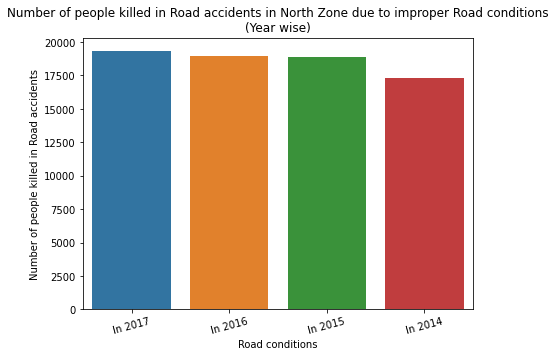

In [89]:
ins_df = killed_df[killed_df['Zones']=='East Zone'] #takes all rows under south zone
df=pd.pivot_table(ins_df, index=['Zones'], values=['In 2014','In 2015','In 2016','In 2017' ],fill_value=0,aggfunc=np.sum,).reset_index()
df=df.T
df=df.reset_index()
df=df.rename(columns={'index':'Road conditions',0:'Total'})
df=df.drop(df.index[0])
df=df.sort_values(by=['Total'],ascending = False).head(4)
df
fig,ax=plt.subplots(1,1,figsize=(7,5)) #set figspace
sns.barplot(x=df['Road conditions'],y=df['Total'])
plt.xticks(rotation=15)
plt.ylabel('Number of people killed in Road accidents')
plt.title('Number of people killed in Road accidents in North Zone due to improper Road conditions\n(Year wise)')

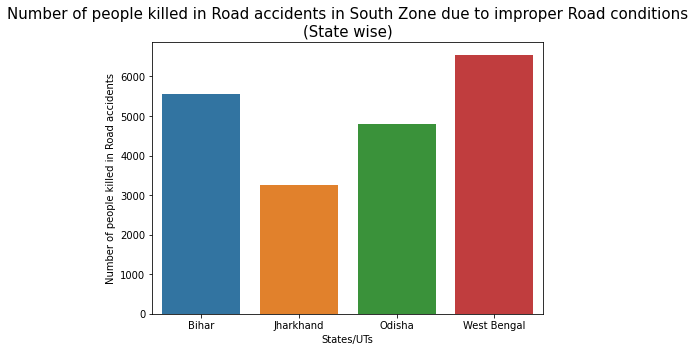

In [90]:
ins_df = killed_df[killed_df['Zones'] == 'East Zone']
df=pd.pivot_table(ins_df, index=['Names'],values=['In 2014','In 2015','In 2016','In 2017'],aggfunc=np.sum).reset_index()
df
years = ['In 2014','In 2015','In 2016','In 2017']
fig,ax = plt.subplots(1,1,figsize=(7,5))
for i,year in enumerate(years):
    sns.barplot(x=df['Names'],y=df[year])
    plt.xlabel('States/UTs')
    plt.ylabel('Number of people killed in Road accidents')
    plt.title('Number of people killed in Road accidents in South Zone due to improper Road conditions\n(State wise)', fontsize=15)

## West Zone Analysis

Text(0.5, 1.0, 'Number of people killed in Road accidents in North Zone due to improper Road conditions\n(Year wise)')

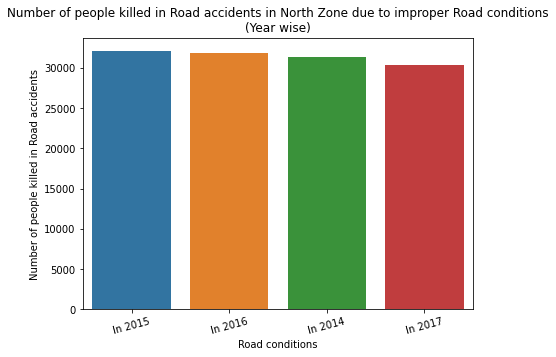

In [91]:
ins_df = killed_df[killed_df['Zones']=='West Zone'] #takes all rows under south zone
df=pd.pivot_table(ins_df, index=['Zones'], values=['In 2014','In 2015','In 2016','In 2017' ],fill_value=0,aggfunc=np.sum,).reset_index()
df=df.T
df=df.reset_index()
df=df.rename(columns={'index':'Road conditions',0:'Total'})
df=df.drop(df.index[0])
df=df.sort_values(by=['Total'],ascending = False).head(4)
df
fig,ax=plt.subplots(1,1,figsize=(7,5)) #set figspace
sns.barplot(x=df['Road conditions'],y=df['Total'])
plt.xticks(rotation=15)
plt.ylabel('Number of people killed in Road accidents')
plt.title('Number of people killed in Road accidents in North Zone due to improper Road conditions\n(Year wise)')

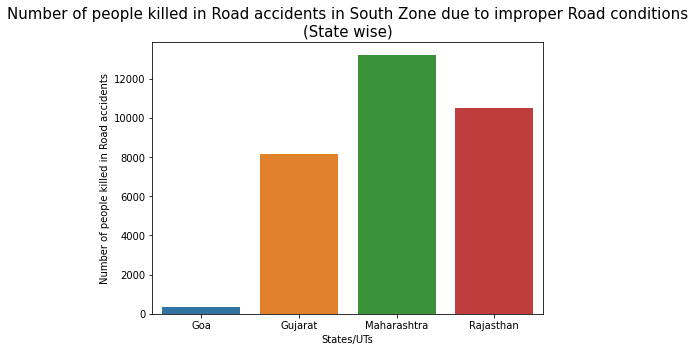

In [92]:
ins_df = killed_df[killed_df['Zones'] == 'West Zone']
df=pd.pivot_table(ins_df, index=['Names'],values=['In 2014','In 2015','In 2016','In 2017'],aggfunc=np.sum).reset_index()
df
years = ['In 2014','In 2015','In 2016','In 2017']
fig,ax = plt.subplots(1,1,figsize=(7,5))
for i,year in enumerate(years):
    sns.barplot(x=df['Names'],y=df[year])
    plt.xlabel('States/UTs')
    plt.ylabel('Number of people killed in Road accidents')
    plt.title('Number of people killed in Road accidents in South Zone due to improper Road conditions\n(State wise)', fontsize=15)

## Central Zone Analysis

Text(0.5, 1.0, 'Number of people killed in Road accidents in North Zone due to improper Road conditions\n(Year wise)')

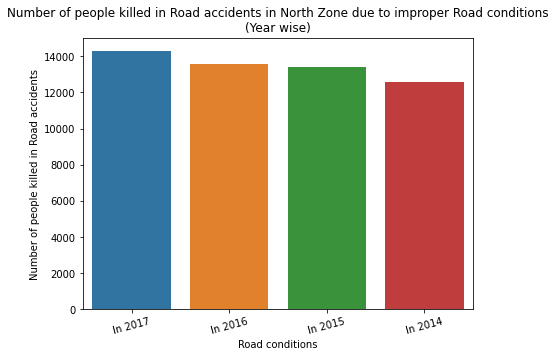

In [93]:
ins_df = killed_df[killed_df['Zones']=='Central Zone'] #takes all rows under south zone
df=pd.pivot_table(ins_df, index=['Zones'], values=['In 2014','In 2015','In 2016','In 2017' ],fill_value=0,aggfunc=np.sum,).reset_index()
df=df.T
df=df.reset_index()
df=df.rename(columns={'index':'Road conditions',0:'Total'})
df=df.drop(df.index[0])
df=df.sort_values(by=['Total'],ascending = False).head(4)
df
fig,ax=plt.subplots(1,1,figsize=(7,5)) #set figspace
sns.barplot(x=df['Road conditions'],y=df['Total'])
plt.xticks(rotation=15)
plt.ylabel('Number of people killed in Road accidents')
plt.title('Number of people killed in Road accidents in North Zone due to improper Road conditions\n(Year wise)')

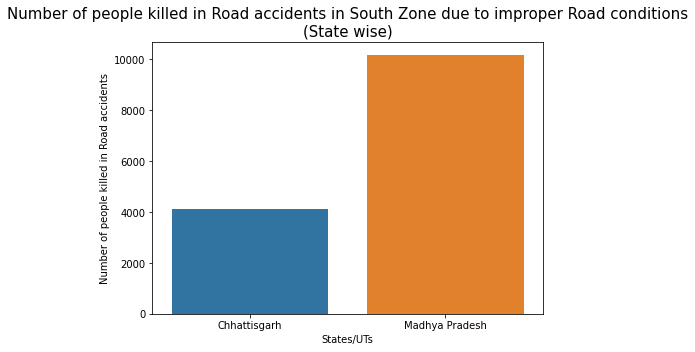

In [94]:
ins_df = killed_df[killed_df['Zones'] == 'Central Zone']
df=pd.pivot_table(ins_df, index=['Names'],values=['In 2014','In 2015','In 2016','In 2017'],aggfunc=np.sum).reset_index()
df
years = ['In 2014','In 2015','In 2016','In 2017']
fig,ax = plt.subplots(1,1,figsize=(7,5))
for i,year in enumerate(years):
    sns.barplot(x=df['Names'],y=df[year])
    plt.xlabel('States/UTs')
    plt.ylabel('Number of people killed in Road accidents')
    plt.title('Number of people killed in Road accidents in South Zone due to improper Road conditions\n(State wise)', fontsize=15)

## North-East Zone Analysis

Text(0.5, 1.0, 'Number of people killed in Road accidents in North Zone due to improper Road conditions\n(Year wise)')

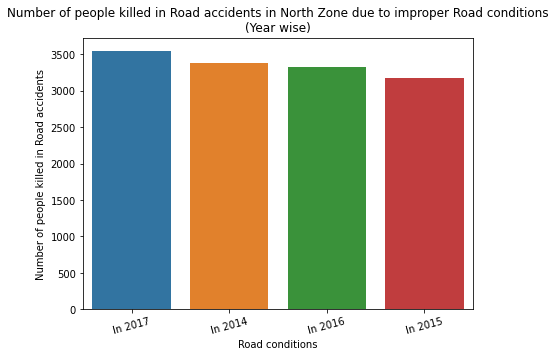

In [95]:
ins_df = killed_df[killed_df['Zones']=='NE Zone'] #takes all rows under south zone
df=pd.pivot_table(ins_df, index=['Zones'], values=['In 2014','In 2015','In 2016','In 2017' ],fill_value=0,aggfunc=np.sum,).reset_index()
df=df.T
df=df.reset_index()
df=df.rename(columns={'index':'Road conditions',0:'Total'})
df=df.drop(df.index[0])
df=df.sort_values(by=['Total'],ascending = False).head(4)
df
fig,ax=plt.subplots(1,1,figsize=(7,5)) #set figspace
sns.barplot(x=df['Road conditions'],y=df['Total'])
plt.xticks(rotation=15)
plt.ylabel('Number of people killed in Road accidents')
plt.title('Number of people killed in Road accidents in North Zone due to improper Road conditions\n(Year wise)')

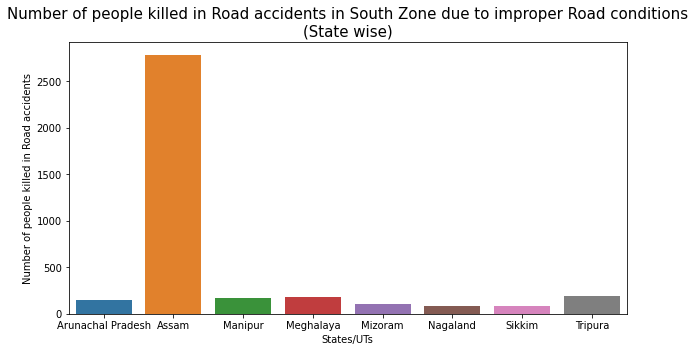

In [96]:
ins_df = killed_df[killed_df['Zones'] == 'NE Zone']
df=pd.pivot_table(ins_df, index=['Names'],values=['In 2014','In 2015','In 2016','In 2017'],aggfunc=np.sum).reset_index()
df
years = ['In 2014','In 2015','In 2016','In 2017']
fig,ax = plt.subplots(1,1,figsize=(10,5))
for i,year in enumerate(years):
    sns.barplot(x=df['Names'],y=df[year])
    plt.xlabel('States/UTs')
    plt.ylabel('Number of people killed in Road accidents')
    plt.title('Number of people killed in Road accidents in South Zone due to improper Road conditions\n(State wise)', fontsize=15)

## Analysis in Union Territories

Text(0.5, 1.0, 'Number of people killed in Road accidents in North Zone due to improper Road conditions\n(Year wise)')

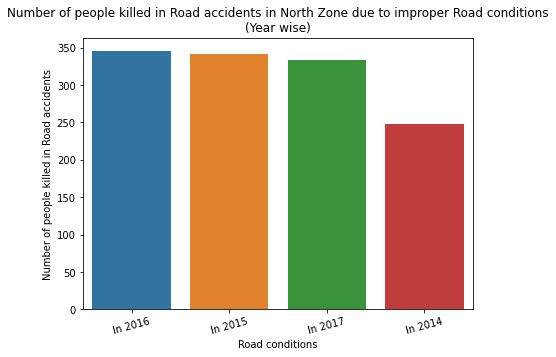

In [97]:
ins_df = killed_df[killed_df['Zones']=='UnionTerritory'] #takes all rows under south zone
df=pd.pivot_table(ins_df, index=['Zones'], values=['In 2014','In 2015','In 2016','In 2017' ],fill_value=0,aggfunc=np.sum,).reset_index()
df=df.T
df=df.reset_index()
df=df.rename(columns={'index':'Road conditions',0:'Total'})
df=df.drop(df.index[0])
df=df.sort_values(by=['Total'],ascending = False).head(4)
df
fig,ax=plt.subplots(1,1,figsize=(7,5)) #set figspace
sns.barplot(x=df['Road conditions'],y=df['Total'])
plt.xticks(rotation=15)
plt.ylabel('Number of people killed in Road accidents')
plt.title('Number of people killed in Road accidents in North Zone due to improper Road conditions\n(Year wise)')

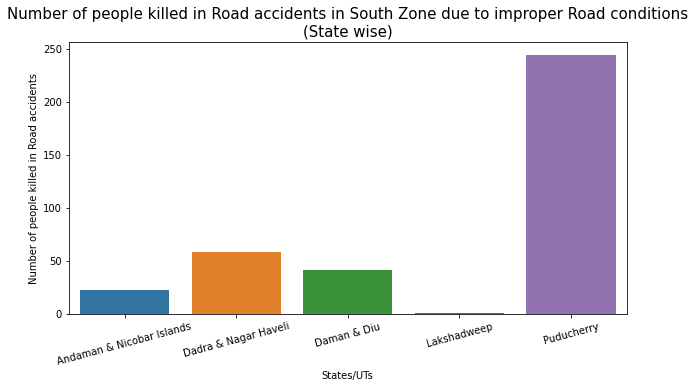

In [98]:
ins_df = killed_df[killed_df['Zones'] == 'UnionTerritory']
df=pd.pivot_table(ins_df, index=['Names'],values=['In 2014','In 2015','In 2016','In 2017'],aggfunc=np.sum).reset_index()
df
years = ['In 2014','In 2015','In 2016','In 2017']
fig,ax = plt.subplots(1,1,figsize=(10,5))
for i,year in enumerate(years):
    sns.barplot(x=df['Names'],y=df[year])
    plt.xlabel('States/UTs')
    plt.xticks(rotation=(15))
    plt.ylabel('Number of people killed in Road accidents')
    plt.title('Number of people killed in Road accidents in South Zone due to improper Road conditions\n(State wise)', fontsize=15)